# Titanic: Machine Learning from Disaster 

Business Problem: The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

** What we want to do: **
We want to complete the analysis of what sorts of people were likely to survive. Using machine learning to predict which passengers survived the tragedy. 

# Step 1: Importing the data

In [1]:
# import some useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
train = pd.read_csv('/Users/Jiaqi/Documents/Data Science/Kaggle/Titanic/train.csv')
test = pd.read_csv('/Users/Jiaqi/Documents/Data Science/Kaggle/Titanic/test.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


From .info() we can see there are some categorical columns in both the train and test set. For categorical columns, we usually change it to numberical values. We should change them both in train and test set. We can combine training and test set together for data cleaning. 

In [9]:
# combine train and test together 
full = train.append(test, ignore_index=True)

# train set has 891 rows. so we can define the first 891 rows from the full dataset as train set
train_df = full[:891]

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 83.6+ KB


# Step 2: Exploratory Data Analysis

Exploring the training set to: 
1. Understand the data, such as relationships among variables
2. Check if there are missing data. If so, deal with missing data
3. Data processing, such as converting categorical variables to numerical variables

In [11]:
# check the head of the training dataset
train_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


VARIABLE DESCRIPTIONS:

- Survived: Survived (1) or died (0) - numeric
- Pclass: Passenger's class - numeric
- Name: Passenger's name - categorical
- Sex: Passenger's sex - categorical
- Age: Passenger's age - numeric
- SibSp: Number of siblings/spouses aboard - numeric
- Parch: Number of parents/children aboard - numeric
- Ticket: Ticket number - numeric + alphabetical
- Fare: Fare - numeric
- Cabin: Cabin - number + char
- Embarked: Port of embarkation - categorical


In [22]:
# check describe
train_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


Note that Age has 714 counts, but there are 891 rows in the training set. There are some missing values for Age. We should keep this in mind and think of way to deal with missing Age. 

In [24]:
# we can also use describe to check for categorical columns 
train_df.describe(include = ['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,204,889,891,891,891
unique,147,3,891,2,681
top,B96 B98,S,"Heininen, Miss. Wendla Maria",male,1601
freq,4,644,1,577,7


In [184]:
# another way to check which column have missing value
train_df.isnull().any()

# we can see Age, Cabin and Embarked have missing value

Age             True
Cabin           True
Embarked        True
Fare           False
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived       False
Ticket         False
dtype: bool

In [185]:
# check full dataset missing value
full.isnull().any()

Age             True
Cabin           True
Embarked        True
Fare            True
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
dtype: bool

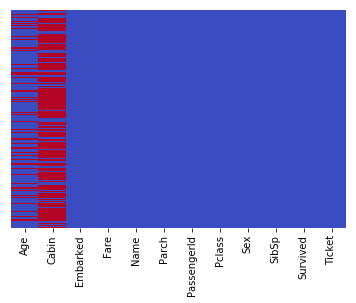

In [25]:
# we can also use heatmap to see which columns have missing data
sns.heatmap(data=train_df.isnull(),yticklabels=False,cbar = False,cmap = 'coolwarm')

# a quick heatmap also shows that Age and Cabin are the top two with missing values

From the above analysis, we see that:
- Age: there are 714 counts, that's 714/891 = 80% about 80% of valid values. For the 20% missing value, we can probably use some computational, such as mean to repleace the missing value
- Cabin: there are 204 counts, that's 204/891 = 23% valid data. There are almost 80% missing value, that too many missing values. We probably can drop this column. 
- Embarked: there are 889 counts, that's 889 / 891 = 99.7% of completed data. For the missing ones, we can probably use the most frequent Embarked code to replace them. 

Text(0.5,1,'Training Set Correlation')

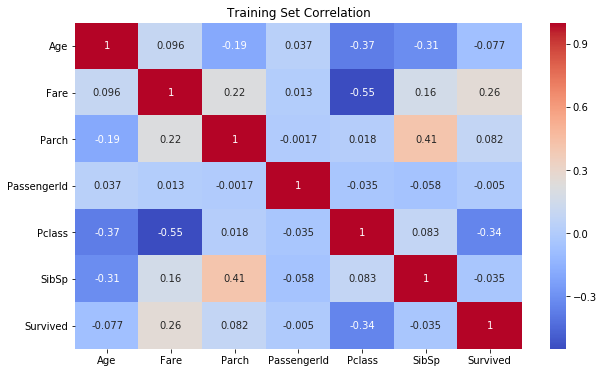

In [34]:
# check the correlation among all variables to try to find out which variables are more important
plt.figure(figsize=(10,6))
sns.heatmap(data=train_df.corr(),annot=True, cmap = 'coolwarm')
plt.title('Training Set Correlation')

# Step 3: Further explore the variables and survivial relationshop by Graphs

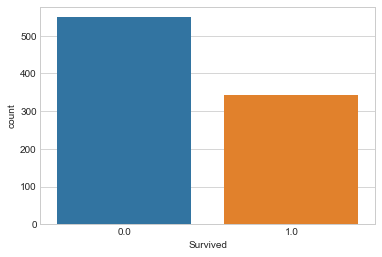

In [37]:
# see distribution of survival 
sns.set_style('whitegrid')
sns.countplot(x = train_df['Survived'])

In [59]:
# check how many people survived
print('Number of Survival: ',
    train_df['Survived'][train_df['Survived'] == 1].count())

# check how many people died
print('Number of death: ', train_df['Survived'][train_df['Survived'] == 0].count())


Number of Survival:  342
Number of death:  549


In [61]:
train_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

Overall, we know there are 342 people survived, 549 people died in the training set. Survival Rate is about 38.38%

** Explore Age vs. Survival **

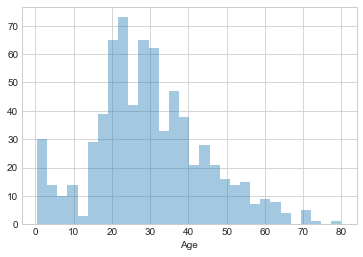

In [118]:
# age distribution 
sns.set_style('whitegrid')
sns.distplot(train_df['Age'].dropna(), bins = 30,kde=False)

Majority of people on board were between 15 to 40 something 

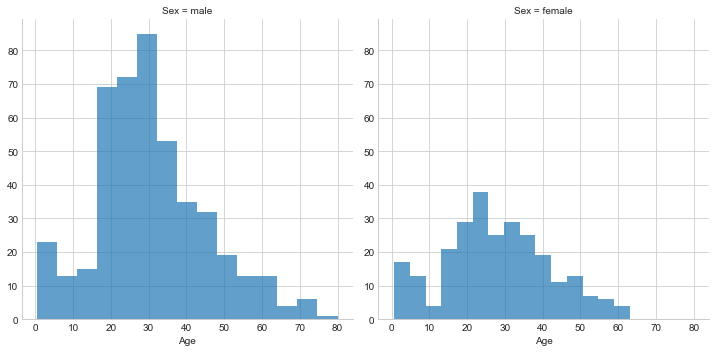

In [126]:
# check the age distribution by gender
g = sns.FacetGrid(train_df, col="Sex", size = 5)
g = (g.map(plt.hist,"Age", bins = 15, alpha=.7).add_legend())

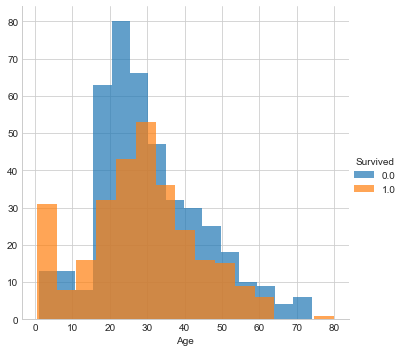

In [123]:
# Age vs. Survived
g = sns.FacetGrid(train_df, hue = 'Survived', size = 5)
g = (g.map(plt.hist,"Age", bins = 15, alpha=.7).add_legend())

We can see two things here: 
1. People who were below 5 years old had higher survival rate. People between 15 to 20 also had higher survival rate. 
2. The oldest person, about 80 years old survived. 

Age is a good feature to predict survival rate

** Explore Gender vs. Survival **

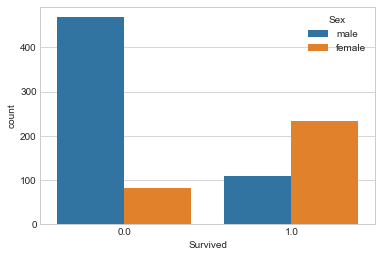

In [125]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_df, hue = 'Sex')

# this graph clearly shows that female has higher survival rate than male

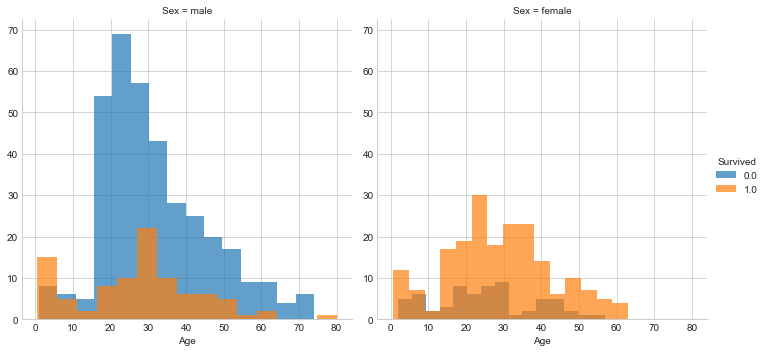

In [124]:
# Age vs. Survived, seperate by gender
g = sns.FacetGrid(train_df, col="Sex",hue = 'Survived', size = 5)
g = (g.map(plt.hist,"Age", bins = 15, alpha=.7).add_legend())

We can see that the survival rate for male is much lower than the survival rate for female. Gender will be one important feature to predict survival. 

We can also see that when age is below 5 years old, both gender have a high survival rate. Also, young female, from 15 to 40, have high surival rate. Age will be a good feature to predict survival too. 

** Explore other numeric variable **
1. Fare vs. Survived


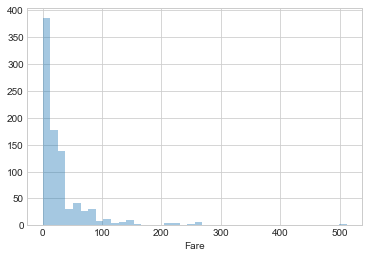

In [127]:
# check Fare distribution
sns.distplot(train_df['Fare'], bins = 40, kde=False)

Majority of the Fare onboard is less than 100. 

Question: what's the survival rate in turns of fare? Check out the following graph.

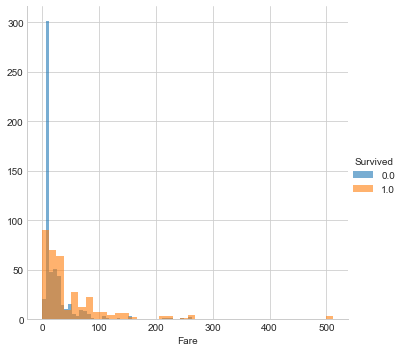

In [132]:
g = sns.FacetGrid(data = train_df, hue = 'Survived', size = 5)
g = g.map(plt.hist, 'Fare', bins = 40, alpha = 0.6).add_legend()

If we just looking at Fare, we see number of survival is greater than number of death in each fare range, with only one expection for fare around 20 something. 

What if we add gender?

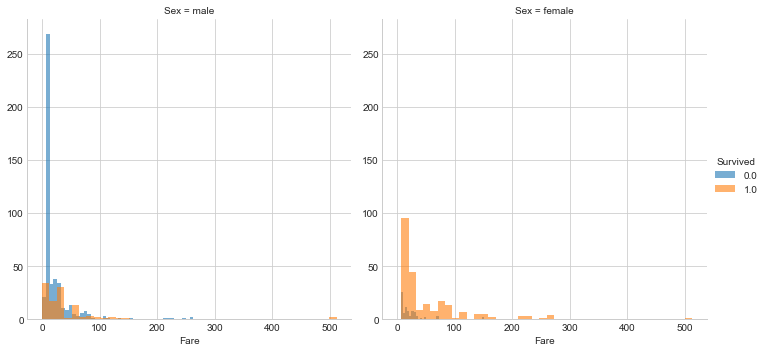

In [131]:
g = sns.FacetGrid(data = train_df, hue = 'Survived', col = 'Sex', size = 5)
g = g.map(plt.hist, "Fare", bins = 40, alpha = 0.6).add_legend()

We can see that for male, lower fare, lower survival rate. The highest fare male around 500 dollars survived. 

Fare is associated with survival.

** Explore other variables **
1. Pclass
2. SibSp
3. Parch
4. Embarked


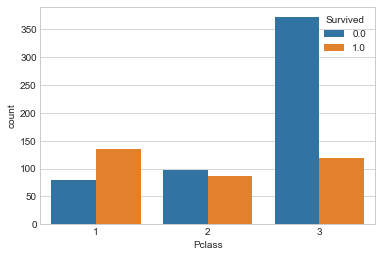

In [142]:
# Pclass
sns.countplot(x = 'Pclass', data = train_df, hue = 'Survived')

We see that Pclass 1 has higher survival rate and Pclass 3 has the lowest survival rate. 

Pclass is a good feature to predict survival

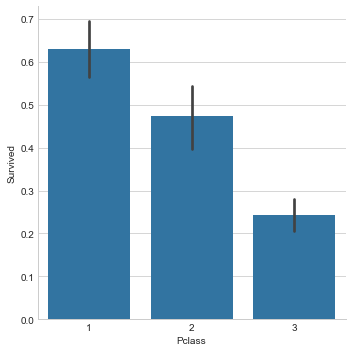

In [141]:
g = sns.FacetGrid(train_df, size = 5)
g.map(sns.barplot ,'Pclass' ,'Survived' )

This barplot also shows that Pclass = 1 has the highest survival rate. 

Pclass is a good feature to predict survival

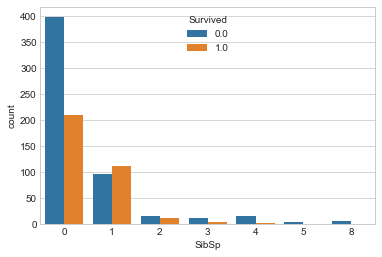

In [145]:
# SibSp
sns.countplot(x = 'SibSp',hue = 'Survived', data = train_df)

We can see: 
1. SibSp = 1 has the highest survival rate. 
2. SibSp = 3 or higher have the lower survival rate
3. SibSp = 5 or 6 have zero survival rate

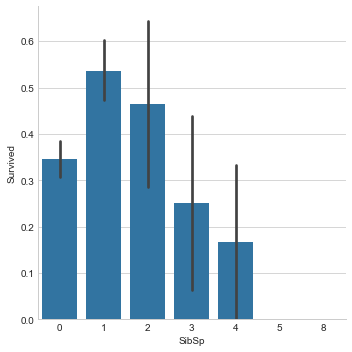

In [144]:
g = sns.FacetGrid(train_df, size = 5)
g = g.map(sns.barplot,'SibSp', 'Survived')

The aboved graph also shows that: 
1. SibSp = 1 has the highest survival rate, while SibSp = 5 or SibSp = 6 has zero survival rate
2. SibSP also a feature to predict survival

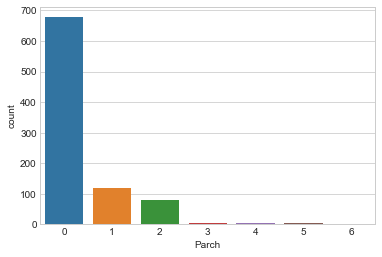

In [150]:
#Parch
sns.countplot(x = 'Parch',data=train_df)

Majority of people have no parent or children. That's Parch = 0

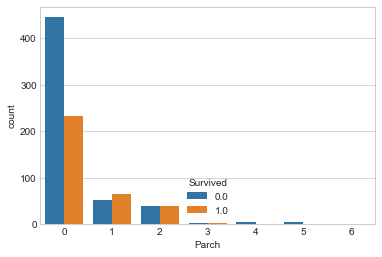

In [151]:
sns.countplot(x='Parch', data=train_df, hue = 'Survived')

1. When Parch = 1, survival rate is higher. 
2. Parch > 4, such as 4, 5 and 6, the survival rate is zero

Parch is also an indicator we can use to predict survival

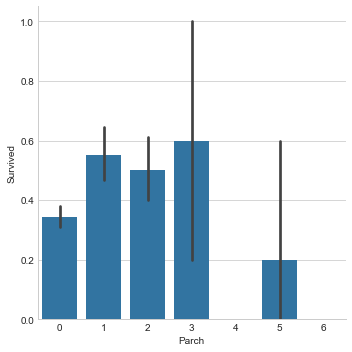

In [152]:
g = sns.FacetGrid(train_df, size = 5)
g = g.map(sns.barplot,'Parch','Survived')

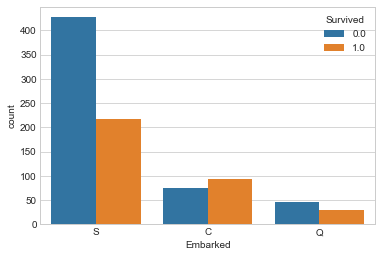

In [154]:
# Embarked
sns.countplot(x='Embarked',hue = 'Survived', data=train_df)

Many people were in Embarked = S, but Embarked = S has lower survival rate. 
Looks like Embarked = C has higher survival rate

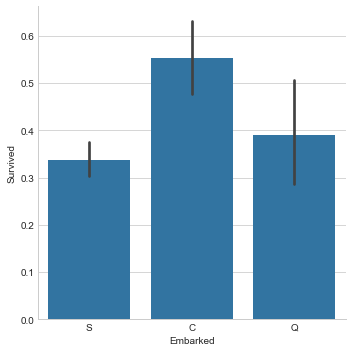

In [159]:
g = sns.FacetGrid(train_df, size = 5)
g = g.map(sns.barplot,'Embarked', 'Survived')

Barplot also shows that Embarked = C has the highest survival rate, then Embarked = Q. Embarked = S has the lowest survival rate. 

After considering these graphs, I think all the variables aboved have some sort of relation to survival. I will include them all. 


# Step 4: Data Cleaning

In [188]:
# recall which columns have missing values
full.isnull().any()

Age             True
Cabin           True
Embarked        True
Fare            True
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
dtype: bool

In [191]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [195]:
full['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

There are four columns have missing values: 
1. Age: about 1046/1309 = 80% complete. We can calculate the mean to replace missing values
2. Cabin: about 295/1309 = 22.5% complete. We don't have enough information to replace the missing values. We will drop this variable
3. Embarked: about 1307/1309 = 99.9% complete. We can use the most frequent embarked code to replace the missing values. 
4. Fare: about 13/8/1309 = 99.9% complete. We can use the average fare to replace the missing value. 

** Data Cleaning for Age **

We can simply use the average mean age to replace all the missing values. However, since different class has different surival rate, and maybe the mean age in different class were different. We can use the mean age in each class to replace the missing value in that class

In [163]:
# calculate mean age in each class
train_df['Age'].groupby(train_df['Pclass']).mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

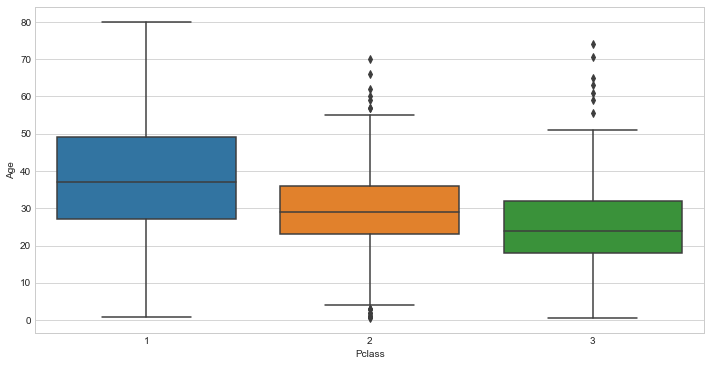

In [196]:
# check if differnet Pclass has different mean age
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age',data=train_df)

In [181]:
# create an empty list to hold mean age in each class
mean_age = []

for i in range(1,4): 
    mean_age.append(train_df['Age'][train_df['Pclass'] == i].mean())

In [182]:
# check the mean_age
mean_age

[38.233440860215055, 29.87763005780347, 25.14061971830986]

In [198]:
# assign mean age to the missing value in each class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1: 
            return mean_age[0]
        if Pclass == 2: 
            return mean_age[1]
        if Pclass == 3:
            return mean_age[2]
    else:
        return Age

In [199]:
full['Age'] = full[['Age','Pclass']].apply(impute_age,axis = 1)

In [207]:
# check if Age still has missing value
full['Age'].isnull().any()

False

In [208]:
# Reassign train_df
train_df = full[:891]

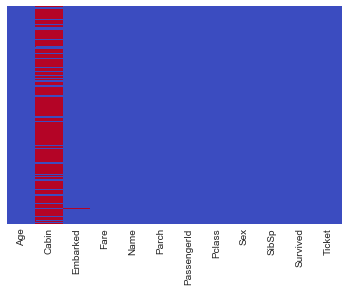

In [210]:
# check heatmap to see if Age missing value is gone
sns.heatmap(data=train_df.isnull(),yticklabels=False,cbar = False,cmap = 'coolwarm')

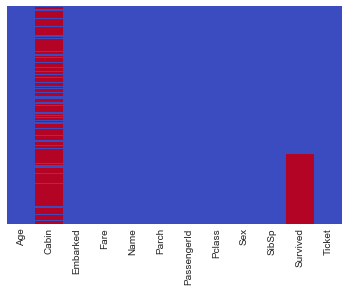

In [211]:
sns.heatmap(data=full.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm')

Yes! We don't see missing value for Age in both train_df and full dataset 

** Data Cleaning for Cabin ** 

Since there are too many missing values for Cabin. We will drop Cabin from our model